## Logistic regression algorithm

First, let's define some variables: <br />
X: train data (#samples, # features) <br />
y: labels (#samples)<br />
w: weights (#features +1)<br />
eta: learning rate<br />

Logistic regression is a binary classification algorithm, where the hypothesis function is described by the sigmoid function:

$$h(X,w) = sigmoid(X*w) = \frac{1}{1+e^{-X*w}}$$

In order to learn the weights w, we are going to maximize the log-likelihood of our data X (we use the log because it is easier to handle it mathematically). Maximization of the log-likelihood can be done via gradient ascent. Thus, during each iteration of gradient ascent, we update the weights according to:

$$w := w + eta* \frac{d}{dw}loglikelihood$$

The derivative of the log-likelihood function can be expressed as the following (for a full derivation, see e.g. lecture notes of Stanford class CS229, http://cs229.stanford.edu/notes/cs229-notes1.pdf ):

$$ \frac{d}{dw}loglikelihood  = (y - h(X,w))*X $$










In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

### Define logistic regression classifier

In [2]:
def sigmoid(z):
    #input: z: 1-D numpy array with shape (#samples)
    return 1.0/(1.0+np.exp(-z))       
def hypothesis(X, w):
    #input: train data X: numpy array with shape (#samples, #features)
    #input: weights w: 1-D numpy array with shape (#features +1)
    #returns sigmoid(matmul) : 1-D numpy array with shape (#samples)
    matmul = np.dot(X, w[1:])+ w[0] #matrix multiplication
    return sigmoid(matmul)  

In [3]:
def gradientAscent(X, y, eta = 0.1, niter = 10):    
    #input: train data X: numpy array with shape (#samples, #features)
    #input: labels y: 1-D numpy array with shape (#samples)
    #eta: learning rate, float
    #niter: number of iterations, integer
    
    #inititalize w's given #features of X
    w = np.zeros((X.shape[1] +1))

    for i in xrange(niter):
        #update weights w := w + eta*grad(dw/dlikelihoodfunction)
        prediction = hypothesis(X,w)
        w[1:] += eta*np.dot(y-prediction, X)
        w[0] += eta*(y-prediction).sum()  #matrix multiplication with ones reduces to a sum
        #print cost(X, y, w)  
    return w

Since the output of the hypothesis function is a numerical value in between 0 and 1 (which can be interpreted as the probability that the datapoint belongs to class 1), we can predict class labels by categorizing the data based on a probability threshold:

In [4]:
def predict(y, threshold = 0.5):
    return np.where(y >=threshold, 1, 0)

Even though we don't need the cost function for the gradient ascent optimization, let's also define the logistic regression cost function:

In [5]:
def cost(X, y, w):
    #input: train data X: numpy array with shape (#samples, #features)
    #input: labels y: 1-D numpy array with shape (#samples)
    #input: weights w: 1-D numpy array with shape (#features +1)
    #
    #derivation of cost function from likelihood function:
    #likelihood function =  product of probabilities p that data is either 0 or 1, for all datapoints
    #p(positive xi) = (hypothesis(xi, w))**y
    #p(negative xi) = (1-hypothesis(xi, w))**(1-yi)
    #take log of that and define cost function by:
    prediction = hypothesis(X,w)
    cost = np.sum(-y*np.log(prediction) - (1-y)*np.log(1-prediction))
    return cost

### Logistic regression with the Iris data

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [7]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Plot the data:

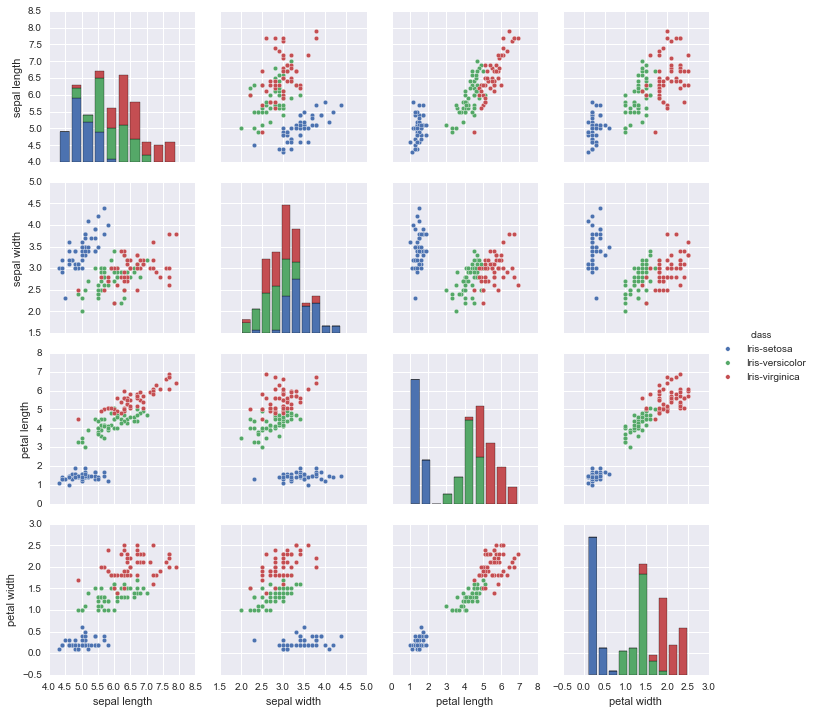

In [8]:
sns.pairplot(df, vars = ['sepal length', 'sepal width', 'petal length', 'petal width'],  hue = 'class')

Since logistic regression is a binary classifier, we only use two of the three classes of the Iris dataset, e.g., we choose to pick Iris-Setosa and Iris-Virginica. 

But first, let's transform class labels from categorical to numerical variables:

In [9]:
labeldict = {'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2}
df['classencoded'] = [labeldict[a] for a in df['class']]  #this can also be done by pd.factorize()

Select only datapoints within class 0 and 1 (and drop all the class 2 data)

In [10]:
df = df[df['classencoded'].isin([0,1])] 

Also, for easier visualization of the logistic regression classifier, let's only use the features 'petal length' and 'petal width'.

In [11]:
y = df['classencoded'].values #y is numpy array
X = df[['petal length', 'petal width']].values  #X is numpy array
print 'labels: ' + str(y.shape)
print 'data:   ' + str(X.shape)

labels: (100,)
data:   (100, 2)


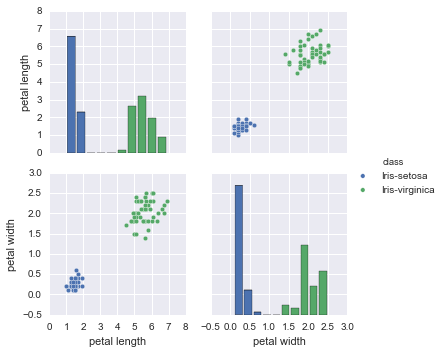

In [12]:
sns.pairplot(df, vars = ['petal length', 'petal width'],  hue = 'class')

Normalize data:

In [13]:
def normalize(X):
    #input: data X: numpy array with shape (#samples, #features)
    #returns normalized array X
    mu = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X = X- mu  #zero means
    X = X/std  #unit variance
    return X
X = normalize(X)

In [14]:
print 'Mean: ' + str(np.mean(X, axis=0))
print 'Std:  ' + str(np.std(X, axis =0))

Mean: [  1.92068583e-16   8.88178420e-18]
Std:  [ 1.  1.]


Run gradient ascent algorithm:

In [15]:
w = gradientAscent(X, y, eta = 0.1, niter = 100)

Predict data and plot decision boundaries:

In [18]:
def plotDataAndBoundaries(X, y, w):
    #set up coordinate system
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    #run hypothesis on meshgrid:
    Z = (hypothesis(np.c_[xx.ravel(), yy.ravel()], w)) #not using predict(), so we can visualize regions of lower probability/less confident classifier
    Z = Z.reshape(xx.shape)
    
    #run hypothesis on data:
    prediction = predict(hypothesis(X, w)) #we are using predict() here
    
    plt.figure(figsize=(10,7))
    #plot decision boundaries
    myplot = plt.contourf(xx, yy, Z, 25, cmap=plt.cm.RdBu, vmin=0, vmax=1) 
    #plot predicted data
    plt.scatter(X[:, 0][prediction==1], X[:, 1][prediction==1], marker = 'D', color = 'b', label = 'y = 1', edgecolor='w' )
    plt.scatter(X[:, 0][prediction==0], X[:, 1][prediction==0], color = 'r', label = 'y = 0', edgecolor='w')


    plt.title('Predicted labels')
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.xlim((x_min, x_max))
    plt.ylim((y_min, y_max))
    plt.colorbar(myplot)
    plt.legend()  

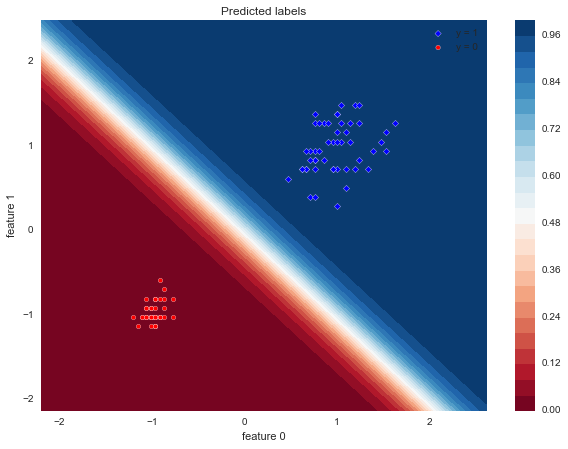

In [17]:
plotDataAndBoundaries(X, y, w)